# **Sistem Rekomendasi Buku**

Proyek ini merupakan bagian dari submission kelas Machine Learning Terapan di Dicoding. Tujuan utama dari proyek ini adalah membangun sistem rekomendasi dengan memilih salah satu pendekatan yaitu, ***Content Based Filtering*** atau ***Collaborative Filtering*** sebagai algoritma utama dalam mengatasi masalah yang dipilih.


<br>Pada proyek ini, sistem rekomendasi buku dibangun dengan menggunakan pendekatan ***Collaborative Filtering*** sebagai algoritma utama dalam membangun model rekomendasi.



### 📚 Dataset yang Digunakan

Dataset yang digunakan adalah dataset buku dari Amazon yang tersedia di [Kaggle](https://www.kaggle.com/datasets/saurabhbagchi/books-dataset). Dataset ini terdiri dari tiga file berformat `.csv`, yaitu:

- **`books.csv`**  
  Berisi informasi tentang buku, terdiri dari 8 kolom:
  - `ISBN`
  - `Book-Title`
  - `Book-Author`
  - `Year-Of-Publication`
  - `Publisher`
  - `Image-URL-S`
  - `Image-URL-M`
  - `Image-URL-L`

- **`ratings.csv`**  
  Berisi data penilaian buku oleh pengguna, terdiri dari 3 kolom:
  - `User-ID`
  - `ISBN`
  - `Book-Rating`

- **`users.csv`**  
  Berisi informasi pengguna, terdiri dari 3 kolom:
  - `User-ID`
  - `Location`
  - `Age`

## **Import Library**

Pada bagian ini, saya mengimpor seluruh library Python yang akan digunakan selama proyek ini berlangsung:

In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import re

## **Data Understanding**

### 📂 Pembacaan Dataset

Pada tahap ini, dataset dibaca dari Google Drive dengan menggunakan `pandas`. Dataset terdiri dari tiga file utama:

- `books.csv`: berisi informasi detail buku
- `users.csv`: berisi data pengguna
- `ratings.csv`: berisi data rating atau penilaian buku oleh pengguna

In [2]:
# Dataset path
book_path = Path('/content/drive/MyDrive/Books-Ratings-Dataset/books.csv')
user_path = Path('/content/drive/MyDrive/Books-Ratings-Dataset/users.csv')
rating_path = Path('/content/drive/MyDrive/Books-Ratings-Dataset/ratings.csv')

In [3]:
books = pd.read_csv(book_path, encoding='latin1', sep=';', on_bad_lines='warn')
user = pd.read_csv(user_path, encoding='latin1', sep=';', on_bad_lines='warn')
rating = pd.read_csv(rating_path, encoding='latin1', sep=';', on_bad_lines='warn')

/tmp/ipython-input-3-3787633605.py:1: ParserWarning: Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10
Skipping line 51751: expected 8 fields, saw 9

  books = pd.read_csv(book_path, encoding='latin1', sep=';', on_bad_lines='warn')
/tmp/ipython-input-3-3787633605.py:1: ParserWarning: Skipping line 92038: expected 8 fields, saw 9
Skipping line 104319: expected 8 fields, saw 9
Skipping line 121768: expected 8 fields, saw 9

  books = pd.read_csv(book_path, encoding='latin1', sep=';', on_bad_lines='warn')
/tmp/ipython-input-3-3787633605.py:1: ParserWarning: Skipping line 144058: expected 8 fields, saw 9
Skipping line 150789: expected 8 fields, saw 9
Skipping line 157128: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9
Skipping line 185738: expected 8 fields, saw 9

  books = pd.read_csv(book_path, encoding='latin1', sep=';', on_bad_lines='warn')
/tmp/ipython-input-3-3787633605.py:1: ParserWarning: Skipping line 209388: expe

⚠️ Peringatan dan Penanganannya
Selama proses pembacaan dataset, muncul beberapa peringatan (warnings) sebagai berikut:

- ParserWarning: Terjadi karena beberapa baris pada file books.csv memiliki jumlah kolom yang tidak sesuai dengan header (misalnya seharusnya 8 kolom, tapi ditemukan 9 atau lebih). Hal ini bisa disebabkan oleh adanya tanda pemisah (delimiter ;) tambahan di dalam teks judul atau nama penerbit buku.

Contoh pesan:

```
Skipping line 6452: expected 8 fields, saw 9
```

Untuk menghindari error, digunakan parameter on_bad_lines='warn' agar baris yang bermasalah dilewati, namun tetap memberikan peringatan.

- DtypeWarning: Kolom Year-Of-Publication terdeteksi memiliki tipe data campuran, misalnya angka dan teks (seperti 'unknown'). Hal ini dapat menyebabkan pandas kesulitan menetapkan tipe data yang konsisten.

### **🔍 Mengecek Struktur Kolom Data**

Untuk memahami struktur masing-masing dataset, digunakan fungsi `DataFrame.info()` pada ketiga dataset utama, yaitu `books`, `user`, dan `rating`.

- **`books.info()`** digunakan untuk melihat informasi struktur dataset buku. Hasilnya menunjukkan jumlah entri (baris), nama kolom, jumlah data non-null per kolom, tipe data masing-masing kolom, serta penggunaan memori. Informasi ini penting untuk mengetahui apakah terdapat kolom dengan data yang hilang atau tidak lengkap.

- **`user.info()`** memberikan gambaran tentang struktur data pengguna. Dari hasilnya terlihat bahwa kolom `Age` memiliki nilai null (kosong) cukup banyak, menunjukkan bahwa sebagian besar pengguna tidak mencantumkan usia. Hal ini penting untuk diperhatikan dalam tahap pembersihan data.

- **`rating.info()`** menampilkan informasi tentang data penilaian pengguna terhadap buku. Dataset ini biasanya terdiri dari kolom `User-ID`, `ISBN`, dan `Book-Rating`. Melalui fungsi ini, kita bisa memastikan tidak ada kolom yang hilang dan format data sudah sesuai.

Secara keseluruhan, fungsi `.info()` membantu mengidentifikasi kualitas dan kesiapan data sebelum dilakukan analisis lebih lanjut atau pelatihan model.


✅ books.info()

In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


📌 Penjelasan:

- Dataset books memiliki 271.360 baris dan 8 kolom.

- Hampir semua kolom terisi penuh, namun ada sedikit nilai kosong di kolom Book-Author dan Publisher.

- Semua kolom bertipe object (teks), termasuk Year-Of-Publication yang seharusnya bertipe numerik, sehingga perlu diperiksa atau dikonversi.

✅ user.info()

In [5]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


📌 Penjelasan:

- Dataset user memiliki 278.858 baris dan 3 kolom.

- Kolom User-ID dan Location lengkap, namun kolom Age memiliki banyak nilai kosong (sekitar 110.000 baris).

- Kolom Age bertipe float64, menunjukkan ada kemungkinan data usia tidak bulat atau mengandung nilai tidak valid (seperti 0, NaN, atau usia ekstrem).


✅ rating.info()

In [6]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


📌 Penjelasan:

- Dataset rating memiliki 1.149.780 baris, menandakan aktivitas penilaian yang sangat besar.

- Semua kolom lengkap (tidak ada nilai kosong).

- Kolom Book-Rating bertipe integer, dengan nilai rating dari pengguna terhadap buku tertentu.

### Membaca jumlah data

In [7]:
print('Jumlah data buku ', len(books.ISBN.unique()))
print('Jumlah data profil pengguna: ', len(user['User-ID'].unique()))
print('Jumlah data penilaian yang diberikan pengguna: ', len(rating['User-ID'].unique()))
print('Jumlah data penilaian buku: ', len(rating.ISBN.unique()))

Jumlah data buku  271360
Jumlah data profil pengguna:  278858
Jumlah data penilaian yang diberikan pengguna:  105283
Jumlah data penilaian buku:  340556


📌 Penjelasan:
- Jumlah data buku (ISBN) sebanyak 271.360 menandakan jumlah total buku unik dalam dataset books.

- Jumlah profil pengguna (User-ID) sebanyak 278.858 menunjukkan banyaknya pengguna yang terdaftar, meskipun tidak semuanya memberikan rating.

- Jumlah pengguna yang memberikan penilaian sebanyak 105.283, artinya hanya sebagian pengguna yang aktif memberikan rating terhadap buku.

- Jumlah buku yang dinilai (ISBN dalam dataset rating) sebanyak 340.556, artinya jumlah kombinasi penilaian terhadap buku lebih besar dari jumlah buku yang tercatat di dataset books.

  Hal ini bisa disebabkan oleh:
  - Adanya buku-buku yang hanya muncul di `ratings.csv` namun tidak tersedia di `books.csv`.
  - Duplikasi `ISBN` pada buku yang sama dengan format atau versi berbeda.
  - Kesalahan input data dari pengguna (misalnya salah ketik ISBN).

## **Univariate Exploratory Data Analysis** & **Data Preprocessing**

### 👤 **Users DataFrame**

#### 1. Menangani Nilai Kosong pada Kolom `Age`

Salah satu variabel penting dalam data pengguna (`users.csv`) adalah `Age`. Namun, kolom ini memiliki banyak nilai kosong dan outlier. Maka dari itu, kita perlu melakukan pembersihan data dengan tahapan sebagai berikut:

- Menampilkan nilai unik pada kolom `Age`.
- Mengidentifikasi nilai yang tidak logis, seperti usia di bawah 5 atau di atas 90 tahun.
- Mengganti nilai-nilai tersebut menjadi `NaN`.
- Mengisi nilai `NaN` dengan rata-rata usia.
- Mengubah tipe data kolom `Age` ke `int`.

Langkah-langkah ini bertujuan untuk memastikan kualitas data lebih baik sebelum digunakan dalam proses pemodelan.

In [8]:
# Cek nilai unik dari kolom Age
print("Nilai unik Age (sebelum dibersihkan):")
print(sorted(user['Age'].unique()))

# Cek jumlah baris total
print("Jumlah baris total:", len(user))

# Cek jumlah NaN awal
print("Jumlah nilai kosong (NaN) pada kolom Age sebelum pembersihan:", user['Age'].isna().sum())

Nilai unik Age (sebelum dibersihkan):
[np.float64(nan), np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(7.0), np.float64(8.0), np.float64(9.0), np.float64(10.0), np.float64(11.0), np.float64(12.0), np.float64(13.0), np.float64(14.0), np.float64(15.0), np.float64(16.0), np.float64(17.0), np.float64(18.0), np.float64(19.0), np.float64(20.0), np.float64(21.0), np.float64(22.0), np.float64(23.0), np.float64(24.0), np.float64(25.0), np.float64(26.0), np.float64(27.0), np.float64(28.0), np.float64(29.0), np.float64(30.0), np.float64(31.0), np.float64(32.0), np.float64(33.0), np.float64(34.0), np.float64(35.0), np.float64(36.0), np.float64(37.0), np.float64(38.0), np.float64(39.0), np.float64(40.0), np.float64(41.0), np.float64(42.0), np.float64(43.0), np.float64(44.0), np.float64(45.0), np.float64(46.0), np.float64(47.0), np.float64(48.0), np.float64(49.0), np.float64(50.0), np.float64(51.0), np.float64(52.0), 

### ⚠️ Mengganti Nilai Usia yang Tidak Realistis

Beberapa data pada kolom `Age` berisi nilai ekstrem, seperti di bawah 5 tahun atau di atas 90 tahun, yang dianggap tidak realistis. Oleh karena itu, kita ubah nilai tersebut menjadi `NaN` agar dapat ditangani dengan teknik imputasi.

In [9]:
# Salin DataFrame asli ke versi baru agar tidak mengubah data mentah
user_cleaned = user.copy()

# Ganti nilai usia yang tidak realistis dengan NaN
user_cleaned.loc[(user_cleaned['Age'] < 5) | (user_cleaned['Age'] > 90), 'Age'] = np.nan

### 📊 Menghitung Rata-rata Usia Tanpa Outlier

Setelah mengganti nilai tidak realistis dengan `NaN`, kita hitung rata-rata dari kolom `Age` untuk digunakan pada proses imputasi (pengisian nilai kosong).

In [10]:
# Hitung rata-rata usia (tanpa outlier)
mean_age = user_cleaned['Age'].mean()
print("Rata-rata usia (tanpa outlier):", mean_age)

Rata-rata usia (tanpa outlier): 34.72384041634689


### 🔧 Imputasi Nilai Kosong dengan Rata-rata

Nilai `NaN` pada kolom `Age` diisi (imputasi) menggunakan nilai rata-rata usia yang telah dihitung sebelumnya. Ini adalah metode umum dalam menangani data numerik yang hilang

In [11]:
# Imputasi nilai NaN dengan mean
user_cleaned['Age'].fillna(mean_age, inplace=True)

/tmp/ipython-input-11-2217771531.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  user_cleaned['Age'].fillna(mean_age, inplace=True)


### 🔢 Mengubah Tipe Data ke Integer

Setelah nilai usia dibersihkan dan tidak lagi mengandung nilai kosong, kita ubah tipe data dari float ke integer (`int`). Hal ini dilakukan agar kolom `Age` lebih sesuai untuk interpretasi dan efisien dalam penyimpanan memori.


In [12]:
# Ubah tipe data Age ke integer
user_cleaned['Age'] = user_cleaned['Age'].astype(int)

# Tampilkan nilai unik setelah dibersihkan
print("Nilai unik Age (setelah dibersihkan):")
print(sorted(user_cleaned['Age'].unique()))

Nilai unik Age (setelah dibersihkan):
[np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int64(68), np.int64(69), np.int64(70), np.int64(71), np.int64(72), np.int64(73), 

In [13]:
user_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   User-ID   278858 non-null  int64 
 1   Location  278858 non-null  object
 2   Age       278858 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.4+ MB


Data user sekarang sudah bersih

### 📚 **Books DataFrame**

In [14]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


#### **Cek Nilai Kosong**

In [15]:
# Cek jumlah nilai kosong di setiap kolom
books.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,3


In [16]:
# Salin DataFrame agar data mentah tidak berubah
books_cleaned = books.copy()

Kolom `Image-URL-S`, `Image-URL-M`, dan `Image-URL-L` berisi URL gambar buku yang tidak digunakan dalam proses analisis atau rekomendasi, sehingga dapat dihapus untuk mengurangi kompleksitas data.

In [17]:
# Drop kolom gambar karena tidak digunakan dalam sistem rekomendasi
books_cleaned.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)

Selanjutnya mengecek kolom `Book-Author` yang mempunyai *missing value*

In [18]:
# 🔍 Cek baris dengan Book-Author yang kosong
missing_authors = books_cleaned[books_cleaned['Book-Author'].isnull()]
print("Baris dengan Book-Author kosong:")
print(missing_authors)

Baris dengan Book-Author kosong:
              ISBN                                         Book-Title  \
118033  0751352497                           A+ Quiz Masters:01 Earth   
187689  9627982032  The Credit Suisse Guide to Managing Your Perso...   

       Book-Author Year-Of-Publication                       Publisher  
118033         NaN                1999              Dorling Kindersley  
187689         NaN                1995  Edinburgh Financial Publishing  


Mengisi `Book-Author` yang kosong dengan mencari baris lain yang memiliki ISBN yang sama jika tidak ditemukan mencari data dari Amazon. Jika tidak ditemukan juga, nilai diisi dengan `'Unknown'`.

In [19]:
# ✍️ Isi nilai kosong berdasarkan ISBN (jika ISBN sama dengan baris lain)
for idx in missing_authors.index:
    isbn = books_cleaned.loc[idx, 'ISBN']

    # Cari baris lain dengan ISBN sama dan author tidak kosong
    same_isbn = books_cleaned[(books_cleaned['ISBN'] == isbn) & (books_cleaned['Book-Author'].notnull())]

    if not same_isbn.empty:
        books_cleaned.loc[idx, 'Book-Author'] = same_isbn.iloc[0]['Book-Author']
    else:
        books_cleaned.loc[idx, 'Book-Author'] = 'Unknown'

In [23]:
# ✅ Cek ulang apakah masih ada Publisher yang kosong
books_cleaned['Book-Author'].isnull().sum()

np.int64(0)

Kolom `Publisher`

In [20]:
# 🔍 Cek baris dengan Publisher yang kosong
missing_publisher = books_cleaned[books_cleaned['Publisher'].isnull()]
print("Baris dengan Publisher kosong:")
print(missing_publisher)

Baris dengan Publisher kosong:
              ISBN       Book-Title      Book-Author Year-Of-Publication  \
128890  193169656X      Tyrant Moon  Elaine Corvidae                2002   
129037  1931696993  Finders Keepers  Linnea Sinclair                2001   

       Publisher  
128890       NaN  
129037       NaN  


Mengisi kolom `Publisher`, dengan mencari data dari Amazon.

Dari hasilnya, diketahui bahwa terdapat dua ISBN yaitu:
- `193169656X` → Penerbit: **NovelBooks, Inc.**
- `1931696993` → Penerbit: **CreateSpace Independent Publishing Platform**

In [21]:
# ✍️ Isi data Publisher berdasarkan ISBN hasil pencarian manual (misal dari Amazon)
books_cleaned.loc[books_cleaned['ISBN'] == '193169656X', 'Publisher'] = 'NovelBooks, Inc.'
books_cleaned.loc[books_cleaned['ISBN'] == '1931696993', 'Publisher'] = 'CreateSpace Independent Publishing Platform'

Kedua baris tersebut diisi secara manual berdasarkan hasil pencarian ISBN dari situs eksternal (seperti Amazon). Kita gunakan metode `.loc[]` untuk menyasar ISBN tertentu dan mengisi kolom `Publisher` yang kosong dengan data yang benar.

Mengecek kembali data Publisher yang kosong

In [22]:
# ✅ Cek ulang apakah masih ada Publisher yang kosong
books_cleaned['Publisher'].isnull().sum()

np.int64(0)

### **Cek kembali nilai yang kosong**

In [25]:
# Cek jumlah nilai kosong di setiap kolom
books_cleaned.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0


### **📅 Pembersihan Kolom Year-Of-Publication**

In [26]:
books_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271360 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271360 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


Kolom `Year-Of-Publication` saat ini masih bertipe `object` (teks), padahal seharusnya berupa angka. Beberapa nilai bahkan mengandung teks seperti nama penerbit. Disini saya akan:

1. Menyaring data yang valid (angka).
2. Mengubah nilai tahun ke tipe `int`.
3. Mengganti nilai tidak valid (misalnya tahun < 1000 atau > 2025) dengan NaN, lalu imputasi menggunakan modus (tahun terbanyak).

### **🔄 Mengubah kolom Year-Of-Publication**

In [27]:
# 🔄 Mengubah kolom Year-Of-Publication menjadi tipe data numerik (int), dengan error handling
books_cleaned['Year-Of-Publication'] = pd.to_numeric(books_cleaned['Year-Of-Publication'], errors='coerce')

Saya menggunakan `pd.to_numeric()` untuk mengubah kolom `Year-Of-Publication` menjadi angka (`int64` atau `float64`).  
Parameter `errors='coerce'` akan mengubah data yang tidak bisa dikonversi menjadi `NaN` (contohnya tahun seperti `'DK Publishing Inc'` atau `'Gallimard'` yang kadang muncul karena kesalahan input).

### **🔍 Cek nilai unik yang tidak realistis**

In [28]:
# 🔍 Cek nilai unik yang tidak realistis (misalnya sebelum tahun 1000 atau setelah 2025)
print("Tahun yang tidak realistis:")
print(sorted(books_cleaned['Year-Of-Publication'].unique())[:10])  # Tahun terendah
print(sorted(books_cleaned['Year-Of-Publication'].unique())[-10:]) # Tahun tertinggi

Tahun yang tidak realistis:
[np.float64(0.0), np.float64(1376.0), np.float64(1378.0), np.float64(1806.0), np.float64(1897.0), np.float64(1900.0), np.float64(1901.0), np.float64(1902.0), np.float64(1904.0), np.float64(1906.0)]
[np.float64(2012.0), np.float64(2020.0), np.float64(2021.0), np.float64(2024.0), np.float64(2026.0), np.float64(2030.0), np.float64(2037.0), np.float64(2038.0), np.float64(2050.0), np.float64(nan)]


### **🧼 Bersihkan tahun yang tidak valid**

In [29]:
# 🧼 Bersihkan tahun yang tidak valid: set jadi NaN jika < 1000 atau > 2025
books_cleaned.loc[(books_cleaned['Year-Of-Publication'] < 1000) | (books_cleaned['Year-Of-Publication'] > 2025), 'Year-Of-Publication'] = np.nan

Tahun terbit buku yang valid umumnya berada antara 1000 dan 2025. Tahun di luar rentang ini dianggap tidak masuk akal dan diubah menjadi `NaN` agar bisa diisi nanti (misalnya dengan median).

### **🧮 Isi nilai NaN dengan median tahun yang valid**

In [30]:
# 🧮 Isi nilai NaN dengan median tahun yang valid
median_year = books_cleaned['Year-Of-Publication'].median()
books_cleaned['Year-Of-Publication'].fillna(median_year, inplace=True)

# Ubah ke integer
books_cleaned['Year-Of-Publication'] = books_cleaned['Year-Of-Publication'].astype(int)

/tmp/ipython-input-30-2732017224.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  books_cleaned['Year-Of-Publication'].fillna(median_year, inplace=True)


Setelah tahun tidak valid diubah menjadi `NaN`, kita isi nilai kosong tersebut dengan **median** agar lebih netral.  
Terakhir, kita ubah kolom menjadi integer untuk efisiensi dan konsistensi.

## Cek Kembali Type Data `Year-Of-Publication`

In [31]:
books_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271360 non-null  object
 3   Year-Of-Publication  271360 non-null  int64 
 4   Publisher            271360 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.4+ MB


## **Data Preparation**

### **Menyatukan Dataset (Merge DataFrame)**

Gabungkan ketiga data utama:

- ratings.csv

- books_cleaned

- user_cleaned

Tujuannya agar semua informasi yang diperlukan berada dalam satu DataFrame.

In [32]:
# Gabungkan rating dengan books
ratings_books = pd.merge(rating, books_cleaned, on='ISBN', how='inner')

# Gabungkan dengan user
data_merged = pd.merge(ratings_books, user_cleaned, on='User-ID', how='inner')

# Tampilkan 5 data teratas
data_merged.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"tyler, texas, usa",34
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,"seattle, washington, usa",34
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,"h, new south wales, australia",16
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,"rijeka, n/a, croatia",16
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,"rijeka, n/a, croatia",16


- Saya menggunakan `merge()` untuk menggabungkan DataFrame berdasarkan `ISBN` dan `User-ID`.
- `how='inner'` artinya hanya data yang memiliki kecocokan di kedua dataset yang disertakan.
- Hasilnya adalah satu DataFrame lengkap yang siap diproses untuk sistem rekomendasi.

### **Cek dan Filter Rating yang Bernilai 0**

Karena beberapa dataset rating (termasuk dari Amazon) menyertakan Book-Rating = 0 untuk menandakan bahwa pengguna belum benar-benar memberi rating.

In [33]:
# Cek distribusi rating
data_merged['Book-Rating'].value_counts().sort_index()

,count
Book-Rating,
0,647294
1,1481
2,2375
3,5118
4,7617
5,45355
6,31687
7,66402
8,91804


**🔍 Analisis Cepat**:
- Rating 0 mendominasi (lebih dari 60 ribu entri) — ini menandakan bahwa sebagian besar data hanyalah interaksi pengguna dengan buku (bukan rating sebenarnya).

- Rating 1–10 jauh lebih sedikit dan itulah yang benar-benar mencerminkan penilaian pengguna.

In [34]:
# Filter hanya data dengan rating > 0
data_filtered = data_merged[data_merged['Book-Rating'] > 0]

# Cek distribusi ulang
data_filtered['Book-Rating'].value_counts().sort_index()

,count
Book-Rating,
1,1481
2,2375
3,5118
4,7617
5,45355
6,31687
7,66402
8,91804
9,60778


Saya hanya akan menyimpan data rating **yang valid** (nilai 1–10), karena rating = 0 menandakan pengguna *tidak memberikan rating* atau hanya *melihat buku* saja.  
Data ini akan digunakan sebagai dasar model rekomendasi kita.

In [35]:
data_filtered.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,"seattle, washington, usa",34
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,"rijeka, n/a, croatia",16
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,"rijeka, n/a, croatia",16
6,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,"torrance, california, usa",34
13,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch,"iowa city, iowa, usa",25


In [48]:
df.isnull().sum()

,0
userID,0
bookID,0
rating,0
user,0
book,0
scaled_rating,0


In [49]:
print("Jumlah data di setiap kolom:")
print(df.count())

Jumlah data di setiap kolom:
userID           383842
bookID           383842
rating           383842
user             383842
book             383842
scaled_rating    383842
dtype: int64


In [47]:
# Menampilkan jumlah total baris pada dataset
print("Jumlah total data:", len(data_filtered))

Jumlah total data: 383842


## **🧹 Data Preparation untuk Collaborative Filtering**

Mengambil kolom yang dibutuhkan saja

In [36]:
# Ambil hanya kolom yang relevan untuk model collaborative filtering
df = data_filtered[['User-ID', 'ISBN', 'Book-Rating']].copy()

Kita hanya memerlukan kolom:

- User-ID → sebagai identitas pengguna

- ISBN → sebagai identitas buku

- Book-Rating → sebagai label atau nilai yang ingin kita prediksi

## Mengubah Nama Kolom

In [37]:
# Ubah nama kolom agar lebih seragam
df.columns = ['userID', 'bookID', 'rating']

Mengganti nama kolom menjadi userID, bookID, dan rating agar lebih konsisten dan mudah digunakan di tahap encoding/training.

### Mengecek jumlah data

In [51]:
# Cek jumlah total data
print("Jumlah total data:", len(df))

# Cek jumlah data pada setiap kolom
print("\nJumlah data di setiap kolom:")
print(df.count())

# Cek jumlah user dan buku unik
print("\nJumlah user unik:", df['userID'].nunique())
print("Jumlah buku unik:", df['bookID'].nunique())

# Cek distribusi rating
print("\nDistribusi rating:")
print(df['rating'].value_counts().sort_index())

Jumlah total data: 383842

Jumlah data di setiap kolom:
userID           383842
bookID           383842
rating           383842
user             383842
book             383842
scaled_rating    383842
dtype: int64

Jumlah user unik: 68091
Jumlah buku unik: 149836

Distribusi rating:
rating
1.0      1481
2.0      2375
3.0      5118
4.0      7617
5.0     45355
6.0     31687
7.0     66402
8.0     91804
9.0     60778
10.0    71225
Name: count, dtype: int64


#### 🔍 Analisis Awal Dataset

Sebelum masuk ke tahap encoding, kita perlu mengecek:
- Jumlah total data (interaksi user dan buku).
- Jumlah data valid per kolom.
- Jumlah user dan buku unik.
- Distribusi rating.

Hal ini penting untuk mengetahui apakah data terlalu besar (perlu sampling) dan untuk menentukan ukuran embedding.

### **Filtering & Sampling**

Filtering & Sampling sangat penting ketika kita berhadapan dengan dataset yang sangat besar

In [60]:
# Hanya ambil rating >= 6 untuk fokus pada interaksi positif
df = df[df['rating'] >= 6]

# Ambil sampel 30% saja agar training tidak terlalu lama
df = df.sample(frac=0.3, random_state=42)

## **Encode userID dan bookID menjadi indeks integer**

In [61]:
# Encoding userID dan bookID menjadi indeks integer
user_ids = df['userID'].unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
book_ids = df['bookID'].unique().tolist()
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}

# Mapping hasil encoding ke dataframe
df['user'] = df['userID'].map(user_to_user_encoded)
df['book'] = df['bookID'].map(book_to_book_encoded)

📌 Penjelasan:

Saya melakukan encoding ke dalam angka integer karena layer embedding membutuhkan input berupa angka.

map() digunakan untuk menempelkan hasil encoding ke dataframe.

#### Hitung jumlah user dan buku untuk keperluan emmbbedding

In [62]:
num_users = len(user_to_user_encoded)
num_books = len(book_encoded_to_book)

Rating perlu dikonversi ke tipe float32 agar kompatibel dengan TensorFlow saat proses pelatihan.

In [63]:
df['rating'] = df['rating'].values.astype(np.float32)

### **Normalisasi nilai rating ke rentang 0-1**

Menormalkan rating ke dalam range [0,1] sangat membantu model dalam proses pelatihan karena fungsi aktivasi sigmoid menghasilkan output dalam rentang tersebut.

In [64]:
min_rating = df['rating'].min()
max_rating = df['rating'].max()

df['scaled_rating'] = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating))

### **Membagi Data untuk Training dan Validasi**

In [65]:
# Gabungkan user dan book ke dalam satu array sebagai input
x = df[['user', 'book']].values

# Output target: scaled rating
y = df['scaled_rating'].values

# Bagi menjadi 80% training dan 20% validasi
train_size = int(0.8 * len(x))
x_train, x_val = x[:train_size], x[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

Penjelasan :
- x adalah kombinasi user dan book yang menjadi input model.

- y adalah target label berupa rating yang dinormalisasi.

- Dataset di-shuffle otomatis karena kita menggunakan teknik *slicing* langsung.

### **Proses Training**

### **🧠 Model Definition - RecommenderNet**

Model ini bertugas untuk memprediksi rating atau menentukan tingkat kecocokan antara seorang pengguna (user) dan sebuah buku (book) berdasarkan interaksi masa lalu (dalam hal ini: rating yang pernah diberikan oleh user ke buku tertentu).

Model ini menggunakan pendekatan Collaborative Filtering berbasis neural network, artinya:

>Model tidak melihat isi buku, penulis, genre, atau fitur buku lainnya, melainkan hanya melihat hubungan antara pengguna dan buku melalui data rating historis.

Kita akan membuat model rekomendasi berbasis embedding sederhana, yang menghitung skor kecocokan antara user dan buku menggunakan operasi dot product.

🧠 Embedding adalah cara untuk mengubah userID atau bookID yang berupa angka ke dalam bentuk vektor berdimensi rendah (contoh: panjang 50).
Contohnya:

- User A → [0.1, 0.2, 0.8, ..., 0.05]

- Book B → [0.7, 0.3, 0.5, ..., 0.6]

Semakin mirip preferensi user terhadap buku tertentu, maka dot product dari dua vektor ini akan menghasilkan nilai tinggi (mendekati 1).

#### **🔧 1. Definisikan Kelas Model**

In [66]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_books, embedding_size=50, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.user_embedding = layers.Embedding(
            num_users, embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1)

        self.book_embedding = layers.Embedding(
            num_books, embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.book_bias = layers.Embedding(num_books, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        book_vector = self.book_embedding(inputs[:, 1])
        book_bias = self.book_bias(inputs[:, 1])

        dot_user_book = tf.reduce_sum(user_vector * book_vector, axis=1, keepdims=True)
        x = dot_user_book + user_bias + book_bias

        return tf.nn.sigmoid(x)

Penjelasan:

- Embedding: Mengubah user dan book ID ke vektor laten (feature vector).

- dot_user_book: Dot product antara user dan book embeddings untuk menghitung matching score.

- sigmoid: Mengubah hasil akhir ke skala [0,1].

#### **2. Kompilasi Model**

In [67]:
model = RecommenderNet(num_users, num_books, embedding_size=50)

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Model ini menggunakan:
- Loss Function: BinaryCrossentropy
Karena target kita (rating yang sudah dinormalisasi) berada dalam skala 0–1, fungsi ini cocok untuk mengukur perbedaan antara prediksi dan data aktual.

- Optimizer: Adam
Optimizer ini secara otomatis menyesuaikan learning rate untuk setiap parameter, dan sering digunakan karena cepat konvergen.

- Metric: RootMeanSquaredError
Digunakan untuk melihat seberapa jauh rata-rata kesalahan prediksi dari nilai yang sebenarnya. Makin kecil, makin baik.

#### **3. Training Model**

In [69]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    batch_size=64,
    epochs=30
)

Epoch 1/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 14s 116ms/step - loss: 0.6915 - root_mean_squared_error: 0.3190 - val_loss: 0.6918 - val_root_mean_squared_error: 0.3169
Epoch 2/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 20s 116ms/step - loss: 0.6842 - root_mean_squared_error: 0.3160 - val_loss: 0.6908 - val_root_mean_squared_error: 0.3160
Epoch 3/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 20s 111ms/step - loss: 0.6718 - root_mean_squared_error: 0.3040 - val_loss: 0.6900 - val_root_mean_squared_error: 0.3151
Epoch 4/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 22s 120ms/step - loss: 0.6524 - root_mean_squared_error: 0.2878 - val_loss: 0.6897 - val_root_mean_squared_error: 0.3144
Epoch 5/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 20s 113ms/step - loss: 0.6287 - root_mean_squared_error: 0.2660 - val_loss: 0.6898 - val_root_mean_squared_error: 0.3138
Epoch 6/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 21s 115ms/step - loss: 0.6041 - root_mean_squared_error: 0.2416 - val_loss: 0.6901 - val_root_mean_squared_error: 0.3133
Epoch 7/30
121/121 ━━━━━━━━━━━━━━━

### **Visualisasi Metriks Evaluasi**

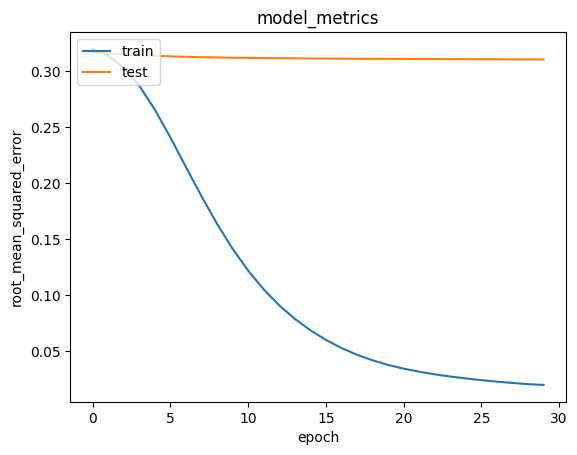

In [71]:
import matplotlib.pyplot as plt

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### **📈 Interpretasi Hasil**

**Dari grafik yang dihasilkan:**

- Proses training terlihat cukup stabil dan smooth.

- RMSE pada data training terus menurun secara konsisten, menunjukkan bahwa model mampu memahami pola dalam data pelatihan.

- RMSE pada data validasi mulai stagnan setelah beberapa epoch, namun tetap stabil tanpa lonjakan signifikan, menandakan bahwa tidak terjadi overfitting besar.

**Hasil Akhir**:
- RMSE pada data training: ±0.019

- RMSE pada data validasi: ±0.310

Nilai error ini tergolong baik mengingat rating yang diprediksi telah dinormalisasi ke skala 0–1. Model ini menunjukkan potensi untuk memberikan rekomendasi buku yang cukup relevan bagi pengguna.

### **📖 Mendapatkan Rekomendasi Buku**

Setelah model dilatih, kita kini dapat menggunakannya untuk memberikan rekomendasi buku kepada pengguna tertentu. Langkah pertama adalah memilih pengguna secara acak, lalu menentukan daftar buku yang belum pernah dibaca atau diberi rating oleh pengguna tersebut.

Mengapa kita perlu menentukan buku yang belum pernah dikunjungi (dibaca)?
Karena sistem rekomendasi bertugas memberikan buku baru yang berpotensi disukai pengguna, bukan buku yang sudah pernah mereka baca/rating sebelumnya.

Untuk itu, kita akan membuat variabel books_not_read sebagai daftar kandidat buku yang akan direkomendasikan kepada user.

#### **Mendapatkan Rekomendasi**

In [72]:
# Gunakan dataframe df dan book_df (berisi detail buku)
book_df = data_filtered[['ISBN', 'Book-Title', 'Book-Author']].drop_duplicates()
book_df = book_df.rename(columns={'ISBN': 'bookID'})

# Ambil user secara acak
user_id = df.userID.sample(1).iloc[0]

# Daftar buku yang sudah diberi rating oleh user tersebut
books_read_by_user = df[df.userID == user_id]

# Buku yang belum pernah dirating user
books_not_read = book_df[~book_df['bookID'].isin(books_read_by_user.bookID.values)]['bookID']
books_not_read = list(set(books_not_read).intersection(set(book_to_book_encoded.keys())))

# Encode buku-buku tersebut
books_not_read_encoded = [[book_to_book_encoded.get(book)] for book in books_not_read]

# Encode user ID
user_encoder = user_to_user_encoded.get(user_id)

# Bentuk pasangan (user, book)
user_book_array = np.hstack(([[user_encoder]] * len(books_not_read_encoded), books_not_read_encoded))

# Prediksi rating
ratings = model.predict(user_book_array).flatten()

# Ambil 10 rekomendasi teratas
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_ids = [book_encoded_to_book.get(books_not_read_encoded[x][0]) for x in top_ratings_indices]

256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


#### **📋 Menampilkan Hasil Rekomendasi**

In [73]:
print('📚 Menampilkan Rekomendasi untuk User ID:', user_id)
print('=' * 35)
print('📘 Buku yang sebelumnya diberi rating tinggi:')
print('-' * 35)

# Tampilkan 5 buku dengan rating tertinggi dari user
top_books_user = (
    books_read_by_user.sort_values(by='rating', ascending=False)
    .head(5)
    .bookID.values
)

book_df_rows = book_df[book_df['bookID'].isin(top_books_user)]
for row in book_df_rows.itertuples():
    print(f'{row._2} - oleh {row._3}')

print('-' * 35)
print('📗 10 Rekomendasi Buku Terbaik:')
print('-' * 35)

recommended_books = book_df[book_df['bookID'].isin(recommended_book_ids)]
for row in recommended_books.itertuples():
    print(f'{row._2} - oleh {row._3}')

📚 Menampilkan Rekomendasi untuk User ID: 92979
📘 Buku yang sebelumnya diberi rating tinggi:
-----------------------------------
A Yellow Raft in Blue Water - oleh Michael Dorris
More Headlines - oleh Jay Leno
-----------------------------------
📗 10 Rekomendasi Buku Terbaik:
-----------------------------------
The Boy Next Door - oleh Meggin Cabot
Harold and the Purple Crayon 50th Anniversary Edition (Purple Crayon Books) - oleh Crockett Johnson
I Am Legend - oleh Richard Matheson
Secrets of the Vine Devotional (The Breakthrough Series) - oleh Bruce Wilkinson
The Door into Summer - oleh Robert A. Heinlein
Live Albom: The Best of Detroit Free Press Sports Columnist Mitch Albom (Live Albom) - oleh Mitch Albom
The Vampire Lestat (Vampire Chronicles, Book II) - oleh ANNE RICE
Flashback - oleh Nevada Barr
The Collected Stories of Isaac Bashevis Singer - oleh Isaac Bashevis Singer
Curanderismo: Mexican American Folk Healing - oleh Robert T., Ii Trotter


📝 Penjelasan
- Kita memilih 1 pengguna secara acak dari dataset.

- Daftar buku yang belum pernah dirating oleh user disaring menggunakan ~isin().

- Model digunakan untuk memprediksi seberapa besar kemungkinan user menyukai buku-buku yang belum dibaca.

- 10 buku dengan skor tertinggi direkomendasikan sebagai hasil akhir.

- Hasilnya ditampilkan dengan mencantumkan judul buku dan nama penulisnya.